# Students Do: Predicting Fraud with Random Forests

In this activity, you will explore how random forest algorithms can be used to identify fraudulent loan applications. You will use the `sba_loans_encoded.csv` file that you created before to train the model.

In [1]:
# Initial imports
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`.

In [2]:
# Loading data
df = pd.read_csv(r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 11\2\06-Stu_Random_Forest\Resources\sba_loans_encoded.csv')

df.head()


,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [3]:
# Define features set
X = df.copy()

X.drop("Default", axis=1, inplace=True)

X.head()

,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

In [4]:
# Define target vector
y = df["Default"].ravel()

y[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

Split the data into training and testing sets.

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    random_state=78)


Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [6]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [8]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [9]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

Once data is scaled, create a random forest instance and train it with the training data (`X_train_scaled` and `y_train`), define `n_estimators=500` and `random_state=78`.

In [10]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500,
                                  random_state=78)

In [11]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

Validate the trained model, by predicting fraudulent loan applications using the testing data (`X_test_scaled`).

In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(cm, 
                     index=["Actual 0", "Actual 1"],
                     columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score
acc = accuracy_score(y_test, predictions)


In [17]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print()
print(f"Accuracy sscore: {acc}")
print()
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,330,14
Actual 1,36,145



Accuracy sscore: 0.9047619047619048

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       344
           1       0.91      0.80      0.85       181

    accuracy                           0.90       525
   macro avg       0.91      0.88      0.89       525
weighted avg       0.91      0.90      0.90       525



## Feature Importance

In this section, you are asked to fetch the features' importance from the random forest model and display the top 10 most important features.

In [18]:
# Get the feature importance array
importances = rf_model.feature_importances_

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

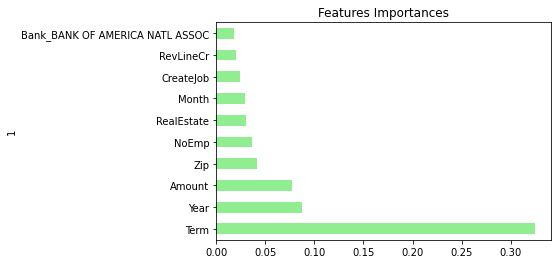

In [45]:
# List the top 10 most important features
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0:"Feature Importances"}, inplace=True)
importances_df_sorted = importances_df.sort_values(by="Feature Importances", ascending=False)

importances_df_sorted[:10].plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## Analysis Questions

Finally, analyze the model's evaluation results and answer the following questions:

* **Question 1:** Would you trust in this model to deploy a fraud detection solution in a bank?

 * I could test it but not deploy is as precision has room for improvement.


* **Question 2:** What are your insights about the top 10 most importance features?

 * The term of the loan seems to do best when predicting factors contributing to fraud.